In [1]:
from ipp_toolkit.predictors.uncertain_predictors import GaussianProcessRegression
from ipp_toolkit.data.domain_data import SafeForestGMapGreennessRegressionData
from ipp_toolkit.predictors.masked_image_predictor import (
    MaskedLabeledImagePredictor,
    EnsembledMaskedLabeledImagePredictor,
)
from ipp_toolkit.planners.masked_planner import RandomMaskedPlanner
from ipp_toolkit.visualization.visualization import visualize_prediction


/home/frc-ag-1/anaconda3/envs/ipp-toolkit/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


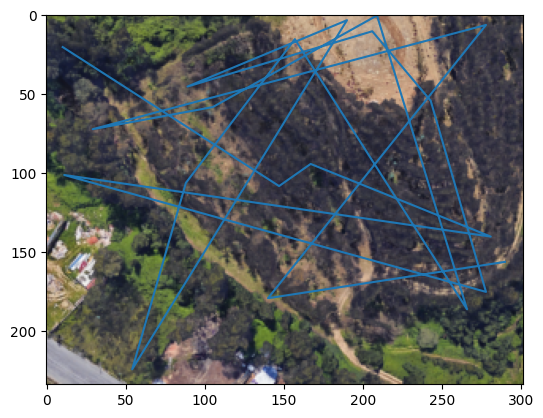

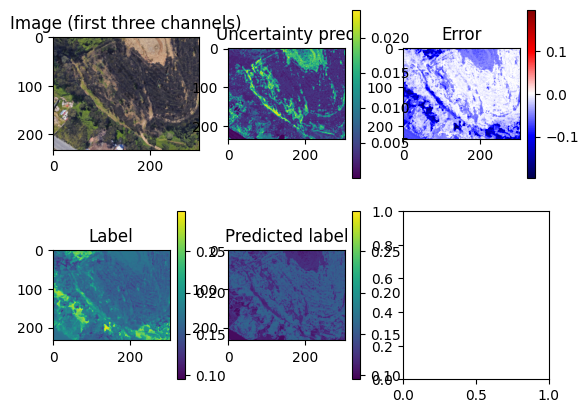

In [2]:


data = SafeForestGMapGreennessRegressionData()
planner = RandomMaskedPlanner(data)
gp = GaussianProcessRegression()
predictor = EnsembledMaskedLabeledImagePredictor(
    data, gp, classification_task=data.is_classification_dataset()
)

plan = planner.plan(20, vis=True)
values = data.sample_batch(plan)
predictor.update_model(plan, values)
prediction = predictor.predict_values_and_uncertainty()

visualize_prediction(data, prediction=prediction, predictor=predictor)